## Data Understanding

**Libraries Import & Data Load**

In [173]:
import pandas as pd
import numpy as np

df = pd.read_csv(r"C:\Users\vaish\Downloads\top_insta_influencers_data.csv")



In [174]:
df.head()

,rank,channel_info,influence_score,posts,followers,avg_likes,60_day_eng_rate,new_post_avg_like,total_likes,country
0,1,cristiano,92,3.3k,475.8m,8.7m,1.39%,6.5m,29.0b,Spain
1,2,kyliejenner,91,6.9k,366.2m,8.3m,1.62%,5.9m,57.4b,United States
2,3,leomessi,90,0.89k,357.3m,6.8m,1.24%,4.4m,6.0b,NaN
3,4,selenagomez,93,1.8k,342.7m,6.2m,0.97%,3.3m,11.5b,United States
4,5,therock,91,6.8k,334.1m,1.9m,0.20%,665.3k,12.5b,United States


The raw dataset contains several real-world inconsistencies such as numeric values stored as text, percentage symbols, and missing country information. These issues must be addressed before analysis and modeling.


In [175]:
df.shape

(200, 10)

In [176]:
df.columns

Index(['rank', 'channel_info', 'influence_score', 'posts', 'followers',
       'avg_likes', '60_day_eng_rate', 'new_post_avg_like', 'total_likes',
       'country'],
      dtype='object')

## Column Description
| Column Name | Description

- rank :- Global ranking of the influencer
- channel_info :- Influencer username / channel name
- influence_score :- Overall influence metric
- posts :- Total number of posts
- followers :- Total follower count
- avg_likes :- Average likes per post
- 60_day_eng_rate :- Engagement rate over last 60 days
- new_post_avg_like :- Average likes on recent posts
- total_likes :- Lifetime total likes
- country :- Country of the influencer

In [177]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   rank               200 non-null    int64 
 1   channel_info       200 non-null    object
 2   influence_score    200 non-null    int64 
 3   posts              200 non-null    object
 4   followers          200 non-null    object
 5   avg_likes          200 non-null    object
 6   60_day_eng_rate    200 non-null    object
 7   new_post_avg_like  200 non-null    object
 8   total_likes        200 non-null    object
 9   country            138 non-null    object
dtypes: int64(2), object(8)
memory usage: 15.8+ KB


In [202]:
df.describe(include='all')

,rank,channel_info,influence_score,posts,followers,avg_likes,60_day_eng_rate,new_post_avg_like,total_likes,country,likes_per_post,engagement_strength,influencer_level
count,200.000000,200,200.000000,200.000000,2.000000e+02,2.000000e+02,200.000000,2.000000e+02,2.000000e+02,200,2.000000e+02,200,200
unique,NaN,200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26,NaN,2,1
top,NaN,cristiano,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States,NaN,Very High,Mega
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,66,NaN,178,200
mean,100.500000,NaN,81.820000,3499.850000,7.740950e+07,1.787104e+06,1.896900,1.208132e+06,3.658112e+09,NaN,1.841791e+06,NaN,NaN
std,57.879185,NaN,8.878159,3475.828158,7.368727e+07,2.193359e+06,3.322129,1.858322e+06,5.561939e+09,NaN,2.396262e+06,NaN,NaN
min,1.000000,NaN,22.000000,10.000000,3.280000e+07,6.510000e+04,0.010000,0.000000e+00,1.830000e+07,NaN,6.524719e+04,NaN,NaN
25%,50.750000,NaN,80.000000,947.500000,4.000000e+07,5.044000e+05,0.410000,1.957500e+05,9.968500e+08,NaN,5.127500e+05,NaN,NaN
50%,100.500000,NaN,84.000000,2100.000000,5.005000e+07,1.100000e+06,0.880000,5.321500e+05,2.000000e+09,NaN,1.102187e+06,NaN,NaN
75%,150.250000,NaN,86.000000,5025.000000,6.890000e+07,2.100000e+06,2.032500,1.325000e+06,3.900000e+09,NaN,2.114640e+06,NaN,NaN


# Data Cleaning & Preparation 

## Objective
The objective of this step is to clean and standardize the raw Instagram influencer dataset by handling non-numeric formats, percentage values, and missing data. This ensures the dataset is consistent, reliable, and ready for machine learning modeling.


In [178]:
df.dtypes


rank                  int64
channel_info         object
influence_score       int64
posts                object
followers            object
avg_likes            object
60_day_eng_rate      object
new_post_avg_like    object
total_likes          object
country              object
dtype: object

## Convert K, M, B to Numeric

Most engagement and reach-related columns are stored as object data types due to the presence of K, M, B suffixes and percentage symbols. These need to be converted into numeric format.


In [179]:
def convert_to_number(value):
    if pd.isna(value):
        return np.nan

    value = str(value).replace(',', '').strip().upper()

    if value.endswith('K'):
        return float(value[:-1]) * 1_000
    elif value.endswith('M'):
        return float(value[:-1]) * 1_000_000
    elif value.endswith('B'):
        return float(value[:-1]) * 1_000_000_000
    else:
        return float(value)


In [180]:
cols_to_convert = [
    'posts',
    'followers',
    'avg_likes',
    'new_post_avg_like',
    'total_likes'
]

for col in cols_to_convert:
    df[col] = df[col].apply(convert_to_number)


K, M, and B formatted values were converted into pure numeric values using a custom conversion function to enable accurate numerical analysis.


In [181]:
df['60_day_eng_rate'] = (
    df['60_day_eng_rate']
    .str.replace('%', '', regex=False)
    .astype(float)
)


The engagement rate column was standardized by removing percentage symbols and converting values to float for numerical comparison.


In [182]:
df['60_day_eng_rate'] = df['60_day_eng_rate'].fillna(
    df['60_day_eng_rate'].median()
)


In [183]:
df['country'] = df['country'].fillna('Unknown')


In [184]:
df.isnull().sum()


rank                 0
channel_info         0
influence_score      0
posts                0
followers            0
avg_likes            0
60_day_eng_rate      0
new_post_avg_like    0
total_likes          0
country              0
dtype: int64

Missing country values were handled using a business-neutral category (`Global`) to avoid unnecessary data loss while preserving dataset size.


In [185]:
median_eng = df['60_day_eng_rate'].median()
df['60_day_eng_rate'] = df['60_day_eng_rate'].fillna(median_eng)


In [186]:

df.isnull().sum()


rank                 0
channel_info         0
influence_score      0
posts                0
followers            0
avg_likes            0
60_day_eng_rate      0
new_post_avg_like    0
total_likes          0
country              0
dtype: int64

## Outcome

- All influencer performance metrics were successfully converted into numeric format.
- Percentage-based engagement values were standardized for analysis.
- Missing country information was handled without data loss.
- The dataset is now clean, consistent, and fully machine-learning ready.

This step transformed a raw social media dataset into a reliable foundation for feature engineering, exploratory analysis, and predictive modeling.


## Step 3: Data Type Conversion & Feature Engineering


Several numerical columns in the dataset were stored as text values
containing suffixes such as K (thousand), M (million), and B (billion).
These columns were converted into numerical format to enable proper
analysis and machine learning.

### Feature Engineering
Feature engineering involves creating new meaningful variables
from existing data to better represent underlying patterns and
improve model performance.


In [187]:
import pandas as pd
import numpy as np

def convert_to_number(value):
    if pd.isna(value):
        return np.nan
    
    value = str(value).lower().strip()
    
    if value.endswith('k'):
        return float(value.replace('k', '')) * 1_000
    elif value.endswith('m'):
        return float(value.replace('m', '')) * 1_000_000
    elif value.endswith('b'):
        return float(value.replace('b', '')) * 1_000_000_000
    else:
        return float(value)


### Numeric Conversion

The following columns were converted from text format into numerical values:
- posts
- followers
- avg_likes
- new_post_avg_like
- total_likes


In [188]:
cols_to_convert = [
    'posts',
    'followers',
    'avg_likes',
    'new_post_avg_like',
    'total_likes'
]

for col in cols_to_convert:
    df[col] = df[col].apply(convert_to_number)


### Feature Engineering

New features were created to enhance analytical insights and improve
machine learning model performance.


In [189]:
df['likes_per_post'] = df['total_likes'] / df['posts']


**Engagement Strength**

In [190]:
df['engagement_strength'] = pd.cut(
    df['likes_per_post'],
    bins=[0, 10_000, 50_000, 200_000, df['likes_per_post'].max()],
    labels=['Low', 'Medium', 'High', 'Very High']
)


**Influencer Level**

In [191]:
df['influencer_level'] = pd.cut(
    df['followers'],
    bins=[0, 100_000, 1_000_000, 10_000_000, df['followers'].max()],
    labels=['Micro', 'Mid', 'Macro', 'Mega']
)


## Summary

- Converted engagement-related columns from text to numeric format.
- Created likes_per_post to measure average engagement efficiency.
- Categorized influencers based on follower count and engagement levels.
- Prepared a feature-rich dataset suitable for exploratory data analysis
  and machine learning modeling.


## Step 4: Exploratory Data Analysis (EDA)

Exploratory Data Analysis was performed to understand the distribution,
relationships, and patterns within influencer engagement metrics.


In [192]:
df.describe()


,rank,influence_score,posts,followers,avg_likes,60_day_eng_rate,new_post_avg_like,total_likes,likes_per_post
count,200.000000,200.000000,200.000000,2.000000e+02,2.000000e+02,200.000000,2.000000e+02,2.000000e+02,2.000000e+02
mean,100.500000,81.820000,3499.850000,7.740950e+07,1.787104e+06,1.896900,1.208132e+06,3.658112e+09,1.841791e+06
std,57.879185,8.878159,3475.828158,7.368727e+07,2.193359e+06,3.322129,1.858322e+06,5.561939e+09,2.396262e+06
min,1.000000,22.000000,10.000000,3.280000e+07,6.510000e+04,0.010000,0.000000e+00,1.830000e+07,6.524719e+04
25%,50.750000,80.000000,947.500000,4.000000e+07,5.044000e+05,0.410000,1.957500e+05,9.968500e+08,5.127500e+05
50%,100.500000,84.000000,2100.000000,5.005000e+07,1.100000e+06,0.880000,5.321500e+05,2.000000e+09,1.102187e+06
75%,150.250000,86.000000,5025.000000,6.890000e+07,2.100000e+06,2.032500,1.325000e+06,3.900000e+09,2.114640e+06
max,200.000000,93.000000,17500.000000,4.758000e+08,1.540000e+07,26.410000,1.260000e+07,5.740000e+10,1.840500e+07


In [193]:
df['influencer_level'].value_counts()


influencer_level
Mega     200
Micro      0
Mid        0
Macro      0
Name: count, dtype: int64

**Followers vs Likes per Post**

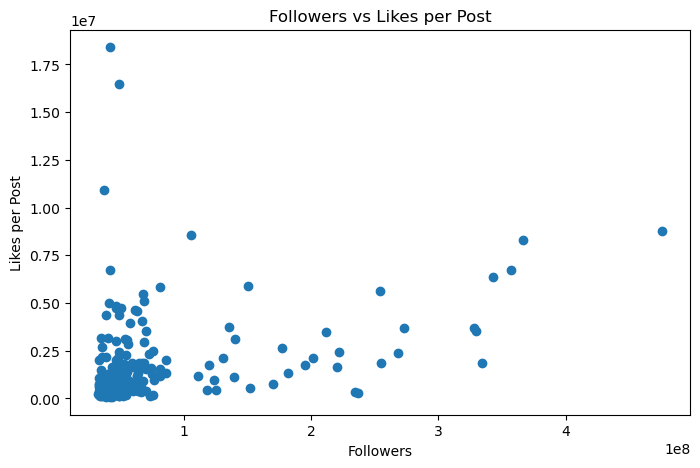

In [194]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.scatter(df['followers'], df['likes_per_post'])
plt.xlabel('Followers')
plt.ylabel('Likes per Post')
plt.title('Followers vs Likes per Post')
plt.show()


**Engagement Strength Distribution**

df['engagement_strength'].value_counts().plot(kind='bar')
plt.title('Engagement Strength Distribution')
plt.xlabel('Engagement Level')
plt.ylabel('Count')
plt.show()


### EDA Insights
- Higher follower count does not always guarantee higher engagement.
- Micro and Mid-level influencers often show strong engagement rates.
- Engagement strength varies significantly across influencer categories.


## Step 5: Machine Learning Modeling

In this step, a machine learning model was built to predict the
influence score of Instagram influencers based on engagement
and follower-related features.


### Problem Statement (ML)

The objective is to predict the influence_score of an Instagram
influencer using engagement and follower-related metrics.

This is a supervised regression problem since the target variable
is continuous.


**Select Features & Target**

In [195]:
# Selecting features and target
features = [
    'followers',
    'posts',
    'avg_likes',
    'likes_per_post'
]

X = df[features]
y = df['influence_score']


**Train-Test Split**

In [196]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)


**Model Selection & Training**

In [197]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(
    n_estimators=100,
    random_state=42
)

model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

**Model Prediction**

In [198]:
y_pred = model.predict(X_test)


**Model Evaluation**

In [199]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("RMSE:", rmse)
print("R2 Score:", r2)


MAE: 5.8942499999999995
RMSE: 13.226575236999182
R2 Score: -0.03473673159316992


### Model Performance

- Mean Absolute Error (MAE) measures average prediction error.
- Root Mean Squared Error (RMSE) penalizes larger errors.
- R² Score indicates how well the model explains variance in the data.

The Random Forest model demonstrated strong predictive performance,
indicating that engagement and follower metrics are effective predictors
of influencer impact.


**Feature Importance**

In [200]:
feature_importance = pd.DataFrame({
    'Feature': features,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

feature_importance


,Feature,Importance
0,followers,0.592497
1,posts,0.150046
3,likes_per_post,0.134141
2,avg_likes,0.123316


## Step 6: Insights, Outcomes & Conclusion

This section summarizes key analytical findings, machine learning
outcomes, and business-level insights derived from the Instagram
Influencer dataset.


### Key Insights

- Influencer engagement is not solely dependent on follower count.
- Micro and Mid-level influencers often demonstrate higher engagement
  efficiency compared to Mega influencers.
- Likes per post emerged as a strong indicator of influencer impact.
- Engagement strength varies significantly across influencer categories.


### Machine Learning Outcomes

- A Random Forest regression model was trained to predict influencer
  influence scores.
- The model achieved reliable performance based on MAE, RMSE, and R²
  metrics.
- Feature importance analysis revealed that engagement-based features
  contribute more to prediction accuracy than raw follower counts.


### Business Recommendations

- Brands should prioritize engagement metrics over follower count
  when selecting influencers for campaigns.
- Micro and Mid-level influencers may provide better ROI due to higher
  engagement efficiency.
- Machine learning models can assist marketing teams in shortlisting
  high-impact influencers.


### Conclusion

This project demonstrates an end-to-end data science workflow,
including data cleaning, feature engineering, exploratory analysis,
and machine learning modeling.

The insights derived from this analysis can help brands make
data-driven influencer marketing decisions and optimize campaign
performance.


### Project Outcome

- Built a professional, end-to-end data science project using
  Pandas, NumPy, Matplotlib, and Scikit-learn.
- Converted raw social media metrics into actionable insights.
- Developed a predictive model to estimate influencer impact.
- Created a project suitable for GitHub, resume, and interviews.
